# CONSTRUÇÃO DO MODELO E APRESENTAÇÃO 


In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tv_0 = pd.read_csv('/content/drive/MyDrive/2022-2A-T05/Grupo 3/datasets/CSV/tv_0_ukn_5_min.csv')

In [4]:
#Como é um modelo supervisionado também precisamos indicar do que se trata a receita. Treinamos nosso modelo:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from lightgbm.sklearn import LGBMRegressor

from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lightgbm as lgb
import pickle

In [5]:
x = tv_0[['Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NAO CONSTA', 'Categoria_NOVELA', 'Categoria_OUTROS',
       'Categoria_POLITICO', 'Categoria_PREMIACAO', 'Categoria_REALITY SHOW',
       'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM', 'Categoria_RURAL',
       'Categoria_SERIES', 'Categoria_SHOW', 'Categoria_SORTEIO',
       'Categoria_TELE VENDAS', 'Mês','Hora Início', 'Dia da Semana_1','Dia da Semana_2','Dia da Semana_3',
       'Dia da Semana_4','Dia da Semana_5','Dia da Semana_6','Dia da Semana_7', 'Dia do Mês', 'Data']]
y = tv_0[['Total Domicílios | Rat%']]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1) # qualquer valor como semente do pseudo-random

In [6]:
hyper_params = {
    'task': 'train', #função
    'boosting_type': 'gbdt', #tipo da regressão (gbdt, rf, dart, goss)
    'objective': 'regression', #tipo do modelo
    'metric': ['l1','l2','rmse'], #erro médio quadrático e erro médio absoluto
    'learning_rate': 0.04, #velocidade do aprendizado
    'feature_fraction': 1, #porcentagem do dataframe a ser utilizado
    'verbose': 0, #usado para retirar possíveis bugs existentes (debug)
    "max_depth": 60, #limita o tamanho de cada árvore
    "num_leaves": 2048, #limita o número de folhas que cada árvore pode ter
    "num_iterations": 5_000, #quantidade de tentativas
}

In [7]:
#Caminho para abrir o arquivo
DATA_PATH = "/content/drive/MyDrive/2022-2A-T05/Grupo 3/Colabs" 

#Abrindo o modelo LGBM
infile = open(DATA_PATH+"/predict_lgbm.pkl",'rb')

#Modelo definido
model = pickle.load(infile)

In [8]:
#E é exatamente a partir da melhor "margem", ou melhor, desse Vetor de Suporte que a linha é criada. O mais interessante que esse é um algoritmo de previsão, então vamos criar um pequeno método:
def predicao(categoria, dia_semana, data, Hora, Minuto, Hora_fim, Minuto_fim):
    Categorias = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    Dia_sem = [0, 0, 0, 0, 0, 0, 0]

    if categoria == 'Categoria_AUDITORIO':
        Categorias[0] = 1
    elif categoria == 'Categoria_CARROS E MOTORES':
        Categorias[1] = 1
    elif categoria == 'Categoria_CULINARIO':
        Categorias[2] = 1
    elif categoria ==  'Categoria_DEBATE' :
        Categorias[3] = 1
    elif categoria == 'Categoria_DOCUMENTARIO':
        Categorias[4] = 1
    elif categoria ==  'Categoria_EDUCATIVO':
        Categorias[5] = 1
    elif categoria ==  'Categoria_ENTREVISTA':
        Categorias[6] = 1
    elif categoria ==  'Categoria_ESPORTE':
        Categorias[7] = 1
    elif categoria == 'Categoria_FEMININO':
        Categorias[8] = 1   
    elif categoria == 'Categoria_FILME':
        Categorias[9] = 1
    elif categoria == 'Categoria_FUTEBOL':
        Categorias[10] = 1
    elif categoria ==  'Categoria_GAME SHOW':
        Categorias[11] = 1
    elif categoria == 'Categoria_HUMORISTICO':
        Categorias[12] = 1
    elif categoria == 'Categoria_JORNALISMO':
        Categorias[13] = 1
    elif categoria == 'Categoria_MINISSERIE':
        Categorias[14] = 1
    elif categoria == 'Categoria_MUSICAL':
        Categorias[15] = 1
    elif categoria == 'Categoria_NOVELA':
        Categorias[17] = 1
    elif categoria == 'Categoria_OUTROS':
        Categorias[18] = 1
    elif categoria == 'Categoria_POLITICO':
        Categorias[19] = 1
    elif categoria ==  'Categoria_PREMIACAO':
        Categorias[20] = 1
    elif categoria ==  'Categoria_REALITY SHOW':
        Categorias[21] = 1
    elif categoria == 'Categoria_RELIGIOSO':
        Categorias[22] = 1
    elif categoria == 'Categoria_REPORTAGEM':
        Categorias[23] = 1
    elif categoria == 'Categoria_RURAL':
        Categorias[24] = 1
    elif categoria == 'Categoria_SERIES':
        Categorias[25] = 1
    elif categoria == 'Categoria_SHOW':
        Categorias[26] = 1
    elif categoria == 'Categoria_SORTEIO':
        Categorias[27] = 1
    elif categoria == 'Categoria_TELE VENDAS':
        Categorias[28] = 1

    if dia_semana == 'Segunda':
        Dia_sem[0] = 1
    elif dia_semana == 'Terça':
        Dia_sem[1] = 2
    elif dia_semana == 'Quarta':
        Dia_sem[2] = 3
    elif dia_semana == 'Quinta':
        Dia_sem[3] = 4
    elif dia_semana == 'Sexta':
        Dia_sem[4] = 5
    elif dia_semana == 'Sábado':
        Dia_sem[5] = 6
    elif dia_semana == 'Domingo':
        Dia_sem[6] = 7

    ymd = data.split('-')

    year = int(ymd[0])
    lyear = [int(ymd[0])]
    month = int(ymd[1])
    lmonth = [int(ymd[1])]
    day = int(ymd[2])
    lday = [int(ymd[2])]

    #Definindo a hora final e o minuto inicial 
    tempo_inicio =float( Hora + "." + Minuto)

    #Definindo a hora final e o minuto final 
    tempo_fim =float( Hora_fim + "." + Minuto_fim)

    #Criando uma lista de 5 em 5 minutos a partir da hora inicial até a final
    lista_horarios = np.arange(tempo_inicio, tempo_fim, 0.05).tolist()

    #Arredondando os valores para apenas duas casas decimais 
    lista_horarios = np.round(lista_horarios, 2)

    #Corrigindo a lista para ser passada no input
    tempo = [lista_horarios[0]]
    
    #result é a lista que contem as informações para o modelo prever
    result = Categorias + lmonth + tempo + Dia_sem + lday + lyear

    #Lista com todos os resultados das predições no intervalo definido pelo usuario 
    lista_resultado = []

    #Loop que testa a audiência de 5 em 5 minutos 
    for i in lista_horarios:
        result[30] = i 
        predicao_lgbm = model.predict([result], num_iteration=model.best_iteration_)
        lista_resultado.append(predicao_lgbm)

    #Removendo colchetes de cada item da lista dos resultados
    lista_resultado = [i[0] for i in lista_resultado]

    media_rat = np.mean(lista_resultado)

    data_pred = pd.DataFrame({'Horarios':lista_horarios, 'Resultado':lista_resultado})
    
    media_rat = "{:.4f}".format(media_rat)

    return media_rat

In [9]:
import seaborn as sns
def grafico(categoria, dia_semana, data, Hora, Minuto, Hora_fim, Minuto_fim):
    Categorias = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    Dia_sem = [0, 0, 0, 0, 0, 0, 0]

    if categoria == 'Categoria_AUDITORIO':
        Categorias[0] = 1
    elif categoria == 'Categoria_CARROS E MOTORES':
        Categorias[1] = 1
    elif categoria == 'Categoria_CULINARIO':
        Categorias[2] = 1
    elif categoria ==  'Categoria_DEBATE' :
        Categorias[3] = 1
    elif categoria == 'Categoria_DOCUMENTARIO':
        Categorias[4] = 1
    elif categoria ==  'Categoria_EDUCATIVO':
        Categorias[5] = 1
    elif categoria ==  'Categoria_ENTREVISTA':
        Categorias[6] = 1
    elif categoria ==  'Categoria_ESPORTE':
        Categorias[7] = 1
    elif categoria == 'Categoria_FEMININO':
        Categorias[8] = 1   
    elif categoria == 'Categoria_FILME':
        Categorias[9] = 1
    elif categoria == 'Categoria_FUTEBOL':
        Categorias[10] = 1
    elif categoria ==  'Categoria_GAME SHOW':
        Categorias[11] = 1
    elif categoria == 'Categoria_HUMORISTICO':
        Categorias[12] = 1
    elif categoria == 'Categoria_JORNALISMO':
        Categorias[13] = 1
    elif categoria == 'Categoria_MINISSERIE':
        Categorias[14] = 1
    elif categoria == 'Categoria_MUSICAL':
        Categorias[15] = 1
    elif categoria == 'Categoria_NOVELA':
        Categorias[17] = 1
    elif categoria == 'Categoria_OUTROS':
        Categorias[18] = 1
    elif categoria == 'Categoria_POLITICO':
        Categorias[19] = 1
    elif categoria ==  'Categoria_PREMIACAO':
        Categorias[20] = 1
    elif categoria ==  'Categoria_REALITY SHOW':
        Categorias[21] = 1
    elif categoria == 'Categoria_RELIGIOSO':
        Categorias[22] = 1
    elif categoria == 'Categoria_REPORTAGEM':
        Categorias[23] = 1
    elif categoria == 'Categoria_RURAL':
        Categorias[24] = 1
    elif categoria == 'Categoria_SERIES':
        Categorias[25] = 1
    elif categoria == 'Categoria_SHOW':
        Categorias[26] = 1
    elif categoria == 'Categoria_SORTEIO':
        Categorias[27] = 1
    elif categoria == 'Categoria_TELE VENDAS':
        Categorias[28] = 1

    if dia_semana == 'Segunda':
        Dia_sem[0] = 1
    elif dia_semana == 'Terça':
        Dia_sem[1] = 2
    elif dia_semana == 'Quarta':
        Dia_sem[2] = 3
    elif dia_semana == 'Quinta':
        Dia_sem[3] = 4
    elif dia_semana == 'Sexta':
        Dia_sem[4] = 5
    elif dia_semana == 'Sábado':
        Dia_sem[5] = 6
    elif dia_semana == 'Domingo':
        Dia_sem[6] = 7

    ymd = data.split('-')

    year = int(ymd[0])
    lyear = [int(ymd[0])]
    month = int(ymd[1])
    lmonth = [int(ymd[1])]
    day = int(ymd[2])
    lday = [int(ymd[2])]

    #Definindo a hora final e o minuto inicial 
    tempo_inicio =float( Hora + "." + Minuto)

    #Definindo a hora final e o minuto final 
    tempo_fim =float( Hora_fim + "." + Minuto_fim)

    #Criando uma lista de 5 em 5 minutos a partir da hora inicial até a final
    lista_horarios = np.arange(tempo_inicio, tempo_fim, 0.05).tolist()

    #Arredondando os valores para apenas duas casas decimais 
    lista_horarios = np.round(lista_horarios, 2)

    #Corrigindo a lista para ser passada no input
    tempo = [lista_horarios[0]]
    
    #result é a lista que contem as informações para o modelo prever
    result = Categorias + lmonth + tempo + Dia_sem + lday + lyear

    #Lista com todos os resultados das predições no intervalo definido pelo usuario 
    lista_resultado = []

    #Loop que testa a audiência de 5 em 5 minutos 
    for i in lista_horarios:
        result[30] = i 
        predicao_lgbm = model.predict([result], num_iteration=model.best_iteration_)
        lista_resultado.append(predicao_lgbm)

    #Removendo colchetes de cada item da lista dos resultados
    lista_resultado = [i[0] for i in lista_resultado]

    media_rat = np.mean(lista_resultado)

    data_pred = pd.DataFrame({'Horarios':lista_horarios, 'Resultado':lista_resultado})
    
    media_rat = "{:.4f}".format(media_rat)

    grafico = sns.lineplot(data=data_pred, x="Horarios", y="Resultado", 
    markers=False, dashes=True)

    graficuzinho = plt.savefig('/content/drive/MyDrive/2022-2A-T05/Grupo 3/Colabs/Front-end/templates/grafico.png')

    return graficuzinho

7.7095


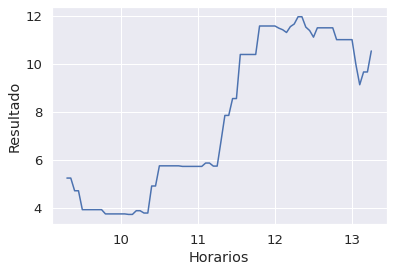

In [10]:
print(predicao('Categoria_AUDITORIO', 'Segunda', '15-10-2022', '09','30', '13', '30'))
grafico('Categoria_AUDITORIO', 'Segunda', '15-10-2022', '09','30', '13', '30')

In [17]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://je9cyr16rqj-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [ ]:
from flask import Flask, render_template, request
app = Flask(__name__, template_folder='/content/drive/MyDrive/2022-2A-T05/Grupo 3/Colabs/Front-end/templates')

@app.route("/")
def home():
    return render_template('home.html')

@app.route("/entrada")
def entrada():
    return render_template('entrada.html')
    
@app.route('/saida',methods = ['POST', 'GET'])
def saida():
    if request.method == 'POST':
        data = request.form['drop_data']
        categoria = request.form['drop_categoria']
        hora_inicio = request.form['start_hour']
        minuto_inicio = request.form['start_minute']
        dia_semana = request.form['drop_weekDay']
        hora_final = request.form['finish_hour']
        minuto_final = request.form['finish_minute']

        pred = predicao(categoria, dia_semana, data, hora_inicio, minuto_inicio, hora_final, minuto_final)
        graph = grafico(categoria, dia_semana, data, hora_inicio, minuto_inicio, hora_final, minuto_final)
        return render_template("saida.html", value=pred, grafico = graph)
      
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:08:25] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:08:27] "GET /entrada HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:08:31] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:08:39] "POST /saida HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:08:41] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:22:21] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:22:25] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:23:23] "GET /entrada HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:23:26] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:24:23] "POST /saida HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2022 12:24:26] "GET /favicon.ico HTTP/1.1" 404 -
